In [95]:
# 동적자산배분전략 (lazyquant 참고)
# 0. 데이터 불러오기 
# 1. 모멘텀 값 생성하기 : 최근 모멘텀 값에 대한 가중치 높음, annualized 개념 
# 2. 타깃 자산 선택하기 : Risk Asset on 일 경우, Risk Asset 중 최고값, 아닐 경우 Safe Asset 중 최고값 
# 3. 수익률 생성하기 
#.4. 성과 분석

import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta
import math
import quantstats as qs

In [96]:
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)

In [97]:
start_day = datetime(2019,6,30)
end_day = datetime.today()

In [98]:
RU = ['SPY','QQQ','VEA','EEM']
CU = ['AGG','LQD','SCHB','DGRO']

In [99]:
def get_price_data(RU, CU):
    df_RCU = pd.DataFrame(columns=RU+CU)
    for ticker in RU + CU:
        df_RCU[ticker] = pdr.get_data_yahoo(ticker, start_day - timedelta(days=365), end_day)['Adj Close']
    return df_RCU

In [100]:
df_RCU = get_price_data(RU,CU)

In [101]:
def get_momentum(x):
    temp_list = [0 for i in range(len(x.index))]
    momentum = pd.Series(temp_list, index=x.index)
    try:
        before1 = df_RCU[x.name - timedelta(days=35):x.name - timedelta(days=30)].iloc[-1][RU + CU]
        before3 = df_RCU[x.name - timedelta(days=95):x.name - timedelta(days=90)].iloc[-1][RU + CU]
        before6 = df_RCU[x.name - timedelta(days=185):x.name - timedelta(days=180)].iloc[-1][RU + CU]
        before12 = df_RCU[x.name - timedelta(days=370):x.name - timedelta(days=365)].iloc[-1][RU + CU]

        momentum = 12 * (x / before1 - 1) + 4 * (x / before3 - 1) + 2 * (x / before6 - 1) + (x / before12 - 1)

    except Exception as e:
        # print("Error : ", str(e))
        pass
    return momentum

In [102]:
mom_col_list = [col+'_Mom' for col in df_RCU[RU+CU].columns]
df_RCU[mom_col_list] = df_RCU[RU+CU].apply(lambda x: get_momentum(x), axis=1)

In [103]:
df_RCU.head(10)

,SPY,QQQ,VEA,EEM,AGG,LQD,SCHB,DGRO,SPY_Mom,QQQ_Mom,VEA_Mom,EEM_Mom,AGG_Mom,LQD_Mom,SCHB_Mom,DGRO_Mom
Date,,,,,,,,,,,,,,,,
2018-06-29,256.1636,167.9034,39.3511,40.6404,98.2021,103.7960,62.3630,31.6789,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-02,256.7112,169.0283,38.9291,40.2371,98.1086,103.8096,62.5331,31.7435,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-03,255.8047,167.0720,39.0117,40.2653,98.3123,104.1913,62.3347,31.6511,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-05,257.8916,169.1457,39.2594,40.1621,98.4048,104.5184,62.8733,31.9191,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-06,260.0729,171.7770,39.5254,40.7155,98.5066,104.6638,63.4026,32.1224,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-09,262.4147,173.3225,39.8831,41.4471,98.4141,104.7365,63.9696,32.3719,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-10,263.3589,173.4497,39.9290,41.3533,98.3400,104.6183,64.1491,32.5383,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-11,261.4327,172.5693,39.2318,40.5466,98.3770,104.8273,63.7050,32.2795,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2018-07-12,263.8028,175.5429,39.5620,41.1000,98.4974,105.0545,64.1964,32.4551,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [104]:
df_RCU[mom_col_list].tail(10)

,SPY_Mom,QQQ_Mom,VEA_Mom,EEM_Mom,AGG_Mom,LQD_Mom,SCHB_Mom,DGRO_Mom
Date,,,,,,,,
2021-09-14,0.7917,1.3970,0.4878,0.0995,0.1932,0.3873,0.7296,0.3748
2021-09-15,0.9276,1.4598,0.6486,0.1494,0.1543,0.3303,0.8914,0.4652
2021-09-16,1.0387,1.6400,0.8068,0.1865,0.1203,0.3028,1.0207,0.5130
2021-09-17,0.9877,1.5365,0.5883,0.0899,0.1025,0.2679,0.9926,0.4991
2021-09-20,0.4877,0.8885,0.2992,-0.1101,0.1128,0.2906,0.5098,0.0932
2021-09-21,0.4766,0.9117,0.5051,0.0089,0.1240,0.2990,0.5062,0.0660
2021-09-22,0.4889,0.8331,0.4231,-0.0130,0.1319,0.3370,0.4515,0.1002
2021-09-23,0.7243,1.0281,0.6017,-0.1484,0.0657,0.2491,0.6752,0.3342
2021-09-24,0.7281,1.0266,0.4151,-0.3804,0.0554,0.2417,0.6549,0.3471


In [105]:
df_RCU = df_RCU[start_day:end_day]
df_RCU = df_RCU.resample(rule='M').last()

In [106]:
df_RCU.tail(10)

,SPY,QQQ,VEA,EEM,AGG,LQD,SCHB,DGRO,SPY_Mom,QQQ_Mom,VEA_Mom,EEM_Mom,AGG_Mom,LQD_Mom,SCHB_Mom,DGRO_Mom
Date,,,,,,,,,,,,,,,,
2020-12-31,370.2581,312.6346,46.4351,51.4447,116.7804,136.0374,90.4446,44.1281,1.4068,1.9890,1.5829,2.0487,0.1700,0.3690,1.6769,1.3067
2021-01-31,366.4850,313.4517,46.1007,53.0776,115.9109,133.5458,90.0769,43.4291,0.9266,1.5327,1.1198,1.9412,-0.0289,-0.0849,1.1983,0.8156
2021-02-28,376.6753,313.0332,47.2220,53.4958,114.1512,130.5232,92.9396,44.6007,0.8823,0.6992,0.8763,0.9417,-0.2920,-0.4278,1.1230,0.7813
2021-03-31,393.7761,318.4072,48.5293,53.1075,112.8426,128.5940,96.4142,47.7888,1.4566,0.9415,1.2120,0.7696,-0.3130,-0.3776,1.4713,1.8892
2021-04-30,414.6109,337.2245,50.0115,53.7447,113.6687,129.9355,101.3092,49.4125,2.1950,2.0811,1.7591,1.1310,-0.0201,0.0443,2.2398,1.9577
2021-05-31,417.3333,333.1737,51.8001,54.6308,113.9003,130.7446,101.7079,50.3134,1.2437,0.7773,1.3927,0.7582,-0.0275,0.0533,1.1626,1.4894
2021-06-30,426.6930,354.0375,51.3229,55.1500,114.8434,133.6359,104.2700,50.1160,1.2709,1.8269,0.6401,0.7713,0.1180,0.3851,1.3269,0.7644
2021-07-31,437.1096,364.1663,51.5819,51.6000,116.1257,135.5322,106.1400,51.4296,1.2692,1.3885,0.7340,-0.7865,0.2170,0.3811,1.1593,1.1960
2021-08-31,450.1180,379.5292,52.2593,52.4100,115.8930,135.0660,109.1500,52.5840,1.3935,1.8679,0.6550,0.1134,0.0857,0.2085,1.3419,1.1315


In [107]:
def select_asset(x):
    asset = pd.Series([0, 0], index=['ASSET', 'PRICE'])

    if x[mom_col_list[0]] > 0 and x[mom_col_list[1]] > 0 and x[mom_col_list[2]] > 0 and x[mom_col_list[3]] > 0:
        max_momentum = max(x[mom_col_list[0]], x[mom_col_list[1]], x[mom_col_list[2]], x[mom_col_list[3]])
    else:
        max_momentum = max(x[mom_col_list[4]], x[mom_col_list[5]], x[mom_col_list[6]],x[mom_col_list[7]])

    asset['ASSET'] = x[x == max_momentum].index[0].replace('_Mom', '')
    asset['PRICE'] = x[asset['ASSET']]
    return asset

In [108]:
df_RCU[['ASSET','PRICE']] = df_RCU.apply(lambda x: select_asset(x), axis=1)

In [109]:
df_RCU.tail(10)

,SPY,QQQ,VEA,EEM,AGG,LQD,SCHB,DGRO,SPY_Mom,QQQ_Mom,VEA_Mom,EEM_Mom,AGG_Mom,LQD_Mom,SCHB_Mom,DGRO_Mom,ASSET,PRICE
Date,,,,,,,,,,,,,,,,,,
2020-12-31,370.2581,312.6346,46.4351,51.4447,116.7804,136.0374,90.4446,44.1281,1.4068,1.9890,1.5829,2.0487,0.1700,0.3690,1.6769,1.3067,EEM,51.4447
2021-01-31,366.4850,313.4517,46.1007,53.0776,115.9109,133.5458,90.0769,43.4291,0.9266,1.5327,1.1198,1.9412,-0.0289,-0.0849,1.1983,0.8156,EEM,53.0776
2021-02-28,376.6753,313.0332,47.2220,53.4958,114.1512,130.5232,92.9396,44.6007,0.8823,0.6992,0.8763,0.9417,-0.2920,-0.4278,1.1230,0.7813,EEM,53.4958
2021-03-31,393.7761,318.4072,48.5293,53.1075,112.8426,128.5940,96.4142,47.7888,1.4566,0.9415,1.2120,0.7696,-0.3130,-0.3776,1.4713,1.8892,SPY,393.7761
2021-04-30,414.6109,337.2245,50.0115,53.7447,113.6687,129.9355,101.3092,49.4125,2.1950,2.0811,1.7591,1.1310,-0.0201,0.0443,2.2398,1.9577,SPY,414.6109
2021-05-31,417.3333,333.1737,51.8001,54.6308,113.9003,130.7446,101.7079,50.3134,1.2437,0.7773,1.3927,0.7582,-0.0275,0.0533,1.1626,1.4894,VEA,51.8001
2021-06-30,426.6930,354.0375,51.3229,55.1500,114.8434,133.6359,104.2700,50.1160,1.2709,1.8269,0.6401,0.7713,0.1180,0.3851,1.3269,0.7644,QQQ,354.0375
2021-07-31,437.1096,364.1663,51.5819,51.6000,116.1257,135.5322,106.1400,51.4296,1.2692,1.3885,0.7340,-0.7865,0.2170,0.3811,1.1593,1.1960,DGRO,51.4296
2021-08-31,450.1180,379.5292,52.2593,52.4100,115.8930,135.0660,109.1500,52.5840,1.3935,1.8679,0.6550,0.1134,0.0857,0.2085,1.3419,1.1315,QQQ,379.5292


In [110]:
def get_return(x):
    rtn_col_list = [col + '_rtn' for col in x[RU + CU].columns]
    x[rtn_col_list] = x[RU + CU].pct_change()
    x['PROFIT'] = 0
    x['PROFIT_ACC'] = 0
    x['LOG_PROFIT'] = 0
    x['LOG_PROFIT_ACC'] = 0

    for i in range(len(x)):
        profit = 0
        log_profit = 0
        if i != 0:
            profit = x[x.iloc[i - 1]['ASSET'] + '_rtn'].iloc[i]
            log_profit = math.log(profit + 1)
        x.loc[x.index[i], 'PROFIT'] = profit
        x.loc[x.index[i], 'PROFIT_ACC'] = (1 + x.loc[x.index[i - 1], 'PROFIT_ACC']) * (
                    1 + profit) - 1
        x.loc[x.index[i], 'LOG_PROFIT'] = log_profit
        x.loc[x.index[i], 'LOG_PROFIT_ACC'] = x.loc[x.index[i - 1], 'LOG_PROFIT_ACC'] + log_profit
    x[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] = x[['PROFIT', 'PROFIT_ACC', 'LOG_PROFIT','LOG_PROFIT_ACC']] * 100
    x[rtn_col_list] = x[rtn_col_list] * 100
    return x

result = get_return(df_RCU)

In [111]:
signal = result['ASSET']
signal

Date
2019-07-31     LQD
2019-08-31     LQD
2019-09-30    DGRO
2019-10-31     QQQ
2019-11-30     QQQ
2019-12-31     EEM
2020-01-31     LQD
2020-02-29     LQD
2020-03-31     AGG
2020-04-30    SCHB
2020-05-31    SCHB
2020-06-30     QQQ
2020-07-31     QQQ
2020-08-31     QQQ
2020-09-30     QQQ
2020-10-31    SCHB
2020-11-30     VEA
2020-12-31     EEM
2021-01-31     EEM
2021-02-28     EEM
2021-03-31     SPY
2021-04-30     SPY
2021-05-31     VEA
2021-06-30     QQQ
2021-07-31    DGRO
2021-08-31     QQQ
2021-09-30    SCHB
Freq: M, Name: ASSET, dtype: object

                    Strategy
------------------  ----------
Start Period        2019-07-31
End Period          2021-09-30
Risk-Free Rate      0.0%
Time in Market      97.0%

Cumulative Return   58.77%
CAGR%               23.75%

Sharpe              6.39
Sortino             13.29
Sortino/√2          9.4

Max Drawdown        -11.12%
Longest DD Days     182

Gain/Pain Ratio     1.89
Gain/Pain (1M)      1.89

Payoff Ratio        1.28
Profit Factor       2.89
Common Sense Ratio  4.71
CPC Index           2.56
Tail Ratio          1.63
Outlier Win Ratio   2.99
Outlier Loss Ratio  1.92

MTD                 -2.42%
3M                  1.68%
6M                  6.98%
YTD                 11.25%
1Y                  20.44%
3Y (ann.)           23.75%
5Y (ann.)           23.75%
10Y (ann.)          23.75%
All-time (ann.)     23.75%

Avg. Drawdown       -4.1%
Avg. Drawdown Days  56
Recovery Factor     5.29
Ulcer Index         0.04
Serenity Index      8.51


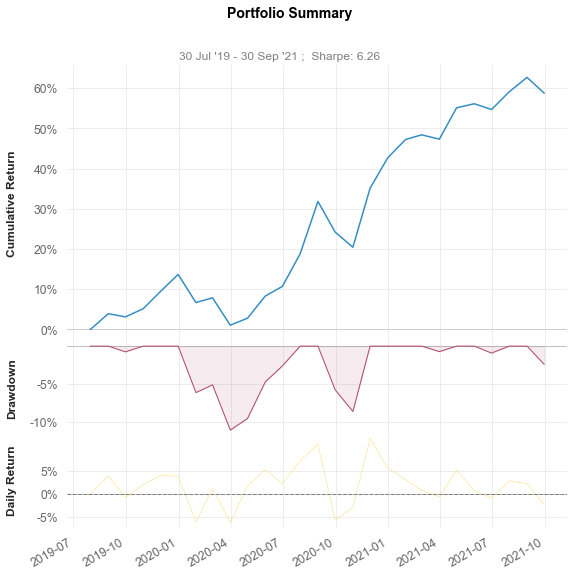

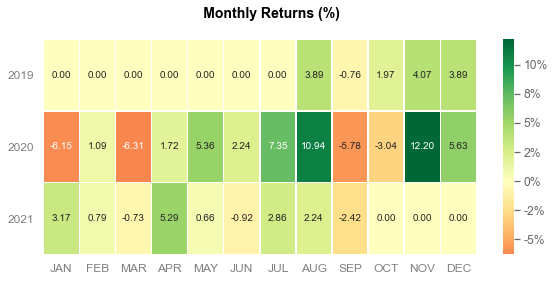

In [112]:
profit = result['PROFIT']/100
qs.reports.basic(profit)